In [1]:
# Notebook setup
import xarray as xr
import pandas as pd
import numpy as np
#!pip install netcdf4
#!pip install seawater
import seawater
import gsw

import matplotlib.pyplot as plt

In [2]:
#load dataset
data=pd.read_csv('ModelOutputDSWTests.csv')
ts=data[['temp', 'salt','depth']]
df=ts.sort_values('temp',ascending=True)
#This is calculating density as CTD data doesn't have this, I have already calcualted density so not sure if need to do this again
df['dens']=seawater.eos80.pden(df['salt'],df['temp'],df['depth'],pr=0)

#find min & max values for temp & salinity
mint=np.min(df['temp'])
maxt=np.max(df['temp'])

mins=np.min(df['salt'])
maxs=np.max(df['salt'])

In [4]:
df.depth

3     472.22
13    472.22
17    472.22
1     472.22
12     13.13
2      13.13
14     13.13
6      13.13
16     13.13
9     472.22
8      13.13
0      13.13
7     472.22
5     472.22
11    472.22
10     13.13
4      13.13
15    472.22
Name: depth, dtype: float64

In [3]:
#calculate seawater density from temp & salinity
#may need to change the hard coded number at end to however many data points you have
tempL=np.linspace(mint-1,maxt+1,19)
salL=np.linspace(mins-1,maxs+1,19)

Tg, Sg = np.meshgrid(tempL,salL)
#sigma_theta = gsw.sigma0(Sg, Tg)
#sigma_theta = seawater.eos80.pden(Sg, Tg, 0)
#may need to change the hard coded number at end to however many data points you have
#cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),285)

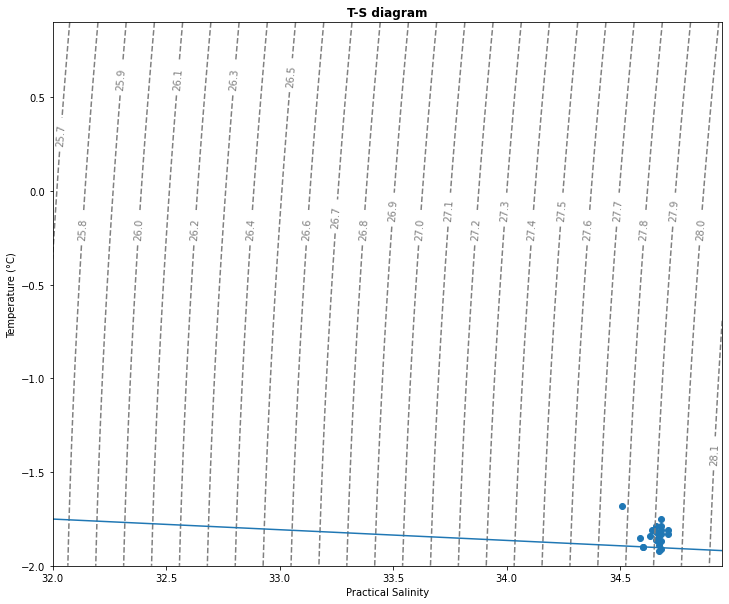

In [4]:
#cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),285)

# TS Diagram with density contours
plt.figure(figsize=(12,10))

# Calculate the density lines
x = np.arange(32, 35, .05)
y = np.arange(-2, 1, .1)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

#freezing point
FP0=seawater.eos80.fp(x, 0)
FP0=seawater.eos80.fp(x, 0)

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.1))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
#nprof = 25 #Selected profile
plt.plot(x,FP0)
plt.scatter(df['salt'],df['temp'])#, c=df['depth'], cmap='viridis_r')
plt.xlabel('Practical Salinity');
plt.ylabel('Temperature (°C)')
plt.title(('T-S diagram'), fontweight='bold');

# Add a colorbar
#cbh = plt.colorbar(label='depth (m)');

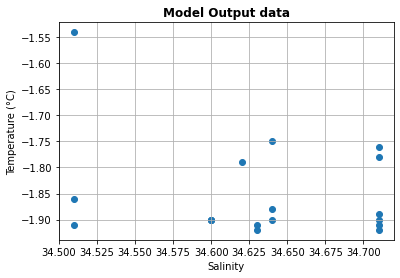

In [28]:
# TS Diagram
data=pd.read_csv('ModelOutputData.csv')
df=data[['ModelRun','temp','salt','depth']]
plt.scatter(df['salt'], df['temp'])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Model Output data', fontweight='bold');

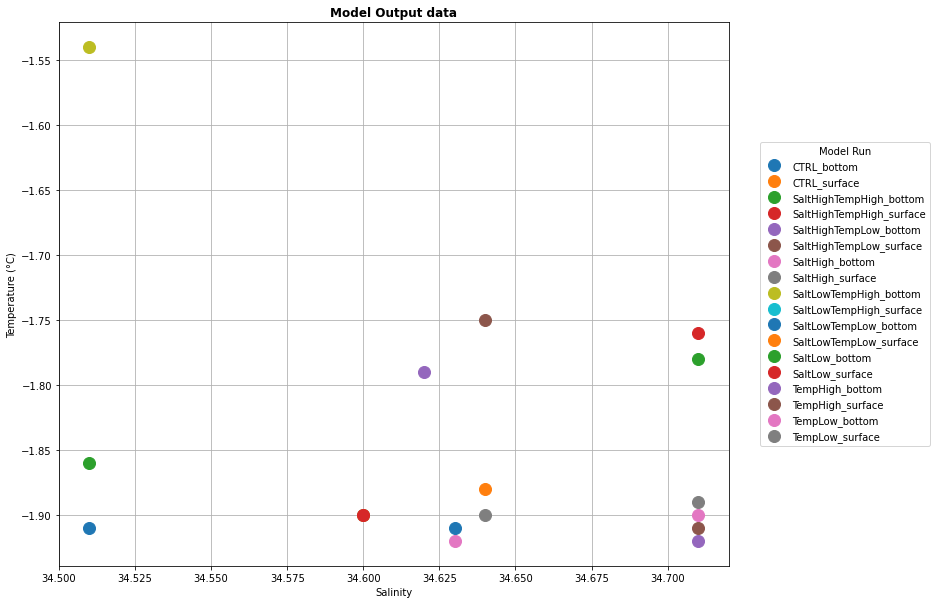

In [118]:
# TS Diagram
data=pd.read_csv('ModelOutputData.csv')
df=data[['ModelRun','temp','salt','depth']]

groups = df.groupby('ModelRun')

for name, group in groups:
    plt.plot(group.salt, group.temp, marker='o', linestyle='',markersize=12, label=name)
plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5))

plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Model Output data', fontweight='bold');
plt.savefig('Model Output Data colours.png')

No handles with labels found to put in legend.


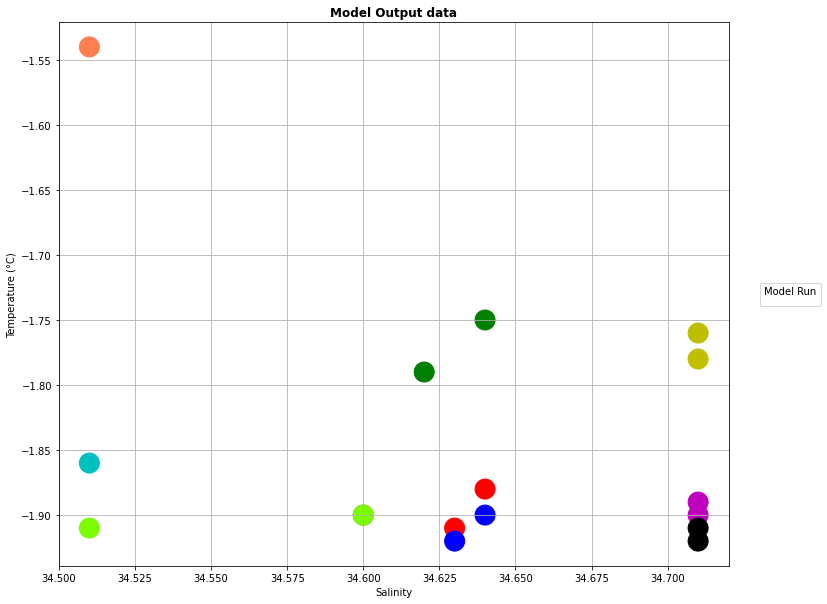

In [114]:
# TS Diagram
data=pd.read_csv('ModelOutputData.csv')
df=data[['ModelRun','temp','salt','depth']]

colours = {'CTRL_surface':'r','CTRL_bottom':'r','TempLow_surface':'b','TempLow_bottom':'b','TempHigh_surface':'g',
           'TempHigh_bottom':'g','SaltLow_surface':'c','SaltLow_bottom':'c','SaltHigh_surface':'m','SaltHigh_bottom':'m',
           'SaltHighTempHigh_surface':'y','SaltHighTempHigh_bottom':'y','SaltHighTempLow_surface':'k',
           'SaltHighTempLow_bottom':'k','SaltLowTempHigh_surface':'coral','SaltLowTempHigh_bottom':'coral',
           'SaltLowTempLow_surface':'lawngreen','SaltLowTempLow_bottom':'lawngreen'}

plt.scatter(df['salt'], df['temp'], c=df['ModelRun'].map(colours), s=400)
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5))

plt.title('Model Output data', fontweight='bold');
plt.savefig('Model Output Data colours grouped')

In [39]:
# TS Diagram
data=pd.read_csv('ModelOutputData.csv')
df=data[['ModelRun','temp','salt','depth']]

colours = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'coral','lawngreen']

{'CTRL_surface':'r','CTRL_bottom':'r','TempLow_surface':'b','TempLow_bottom':'b','TempHigh_surface':'g',
           'TempHigh_bottom':'g','SaltLow_surface':'c','SaltLow_bottom':'c','SaltHigh_surface':'m','SaltHigh_bottom':'m',
           'SaltHighTempHigh_surface':'y','SaltHighTempHigh_bottom':'y','SaltHighTempLow_surface':'k',
           'SaltHighTempLow_bottom':'k','SaltLowTempHigh_surface':'coral','SaltLowTempHigh_bottom':'coral',
           'SaltLowTempLow_surface':'lawngreen','SaltLowTempLow_bottom':'lawngreen'}

plt.scatter(df['salt'], df['temp'], c=df['ModelRun'].map(colours), s=400)
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5))

plt.title('Model Output data', fontweight='bold');

,ModelRun,temp,salt,depth
0,CTRL_surface,-1.88,34.64,13.13
1,CTRL_bottom,-1.91,34.63,472.22
2,TempLow_surface,-1.90,34.64,13.13
3,TempLow_bottom,-1.92,34.63,472.22
4,TempHigh_surface,-1.75,34.64,13.13
5,TempHigh_bottom,-1.79,34.62,472.22
6,SaltLow_surface,-1.90,34.60,13.13
7,SaltLow_bottom,-1.86,34.51,472.22
8,SaltHigh_surface,-1.89,34.71,13.13
9,SaltHigh_bottom,-1.90,34.71,472.22


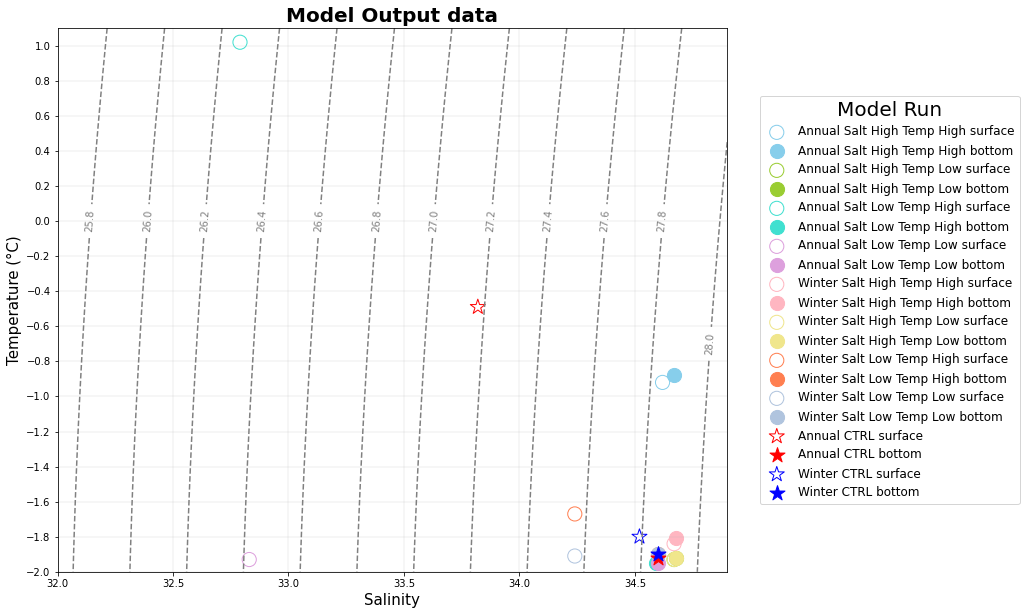

<Figure size 864x720 with 0 Axes>

In [55]:
data=pd.read_csv('ModelOutputDataUpdatedModelRuns.csv')
df=data[['ModelRun','temp','salt','depth']]



# Calculate the density lines
x = np.arange(32, 35, .1)
y = np.arange(-2, 1.2, .1)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.2))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')



colours = ['r', 'skyblue', 'yellowgreen', 'turquoise', 'plum', 'lightpink', 'khaki', 'coral','lightsteelblue', 'b']
markers = ['o','*']

plt.rcParams["figure.figsize"] = (12,10)


Annual_SaltHighTempHigh_surface = plt.scatter(34.62, -0.92, s=200, marker=markers[0], facecolors='none', edgecolors=colours[1], label='Annual Salt High Temp High surface')
Annual_SaltHighTempHigh_bottom = plt.scatter(34.67, -0.88, s=200, marker=markers[0], color=colours[1], label='Annual Salt High Temp High bottom')

Annual_SaltHighTempLow_surface = plt.scatter(34.67, -1.93, s=200, marker=markers[0], facecolors='none', edgecolors=colours[2], label='Annual Salt High Temp Low surface')
Annual_SaltHighTempLow_bottom = plt.scatter(34.68, -1.92, s=200, marker=markers[0], color=colours[2], label='Annual Salt High Temp Low bottom')

Annual_SaltLowTempHigh_surface = plt.scatter(32.79, 1.02, s=200, marker=markers[0], facecolors='none', edgecolors=colours[3], label='Annual Salt Low Temp High surface')
Annual_SaltLowTempHigh_bottom = plt.scatter(34.59, -1.95, s=200, marker=markers[0], color=colours[3], label='Annual Salt Low Temp High bottom')

Annual_SaltLowTempLow_surface = plt.scatter(32.83, -1.93, s=200, marker=markers[0], facecolors='none', edgecolors=colours[4], label='Annual Salt Low Temp Low surface')
Annual_SaltLowTempLow_bottom = plt.scatter(34.6, -1.95, s=200, marker=markers[0], color=colours[4], label='Annual Salt Low Temp Low bottom')






Winter_SaltHighTempHigh_surface = plt.scatter(34.67, -1.84, s=200, marker=markers[0], facecolors='none', edgecolors=colours[5], label='Winter Salt High Temp High surface')
Winter_SaltHighTempHigh_bottom = plt.scatter(34.68, -1.81, s=200, marker=markers[0], color=colours[5], label='Winter Salt High Temp High bottom')

Winter_SaltHighTempLow_surface = plt.scatter(34.67, -1.93, s=200, marker=markers[0], facecolors='none', edgecolors=colours[6], label='Winter Salt High Temp Low surface')
Winter_SaltHighTempLow_bottom = plt.scatter(34.68, -1.92, s=200, marker=markers[0], color=colours[6], label='Winter Salt High Temp Low bottom')

Winter_SaltLowTempHigh_surface = plt.scatter(34.24, -1.67, s=200, marker=markers[0], facecolors='none', edgecolors=colours[7], label='Winter Salt Low Temp High surface')
Winter_SaltLowTempHigh_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[7], label='Winter Salt Low Temp High bottom')

Winter_SaltLowTempLow_surface = plt.scatter(34.24, -1.91, s=200, marker=markers[0], facecolors='none', edgecolors=colours[8], label='Winter Salt Low Temp Low surface')
Winter_SaltLowTempLow_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[8], label='Winter Salt Low Temp Low bottom')


Annual_CTRL_surface = plt.scatter(33.82, -0.49, s=250, marker=markers[1], facecolors='none', edgecolors=colours[0], label='Annual CTRL surface')
Annual_CTRL_bottom = plt.scatter(34.6, -1.92, s=250, marker=markers[1], color=colours[0], label='Annual CTRL bottom')

Winter_CTRL_surface = plt.scatter(34.52, -1.8, s=250, marker=markers[1], facecolors='none', edgecolors=colours[9], label='Winter CTRL surface')
Winter_CTRL_bottom = plt.scatter(34.6, -1.9, s=250, marker=markers[1], color=colours[9], label='Winter CTRL bottom')


plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5), title_fontsize=20, fontsize=12)

yticks=np.arange(-2.0,1.2,0.2)
plt.yticks(yticks)

plt.xlabel('Salinity', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
plt.grid(linewidth=0.2)
plt.title('Model Output data', fontweight='bold', fontsize=20);
plt.show()
plt.savefig('New Model Output Data with density.png')

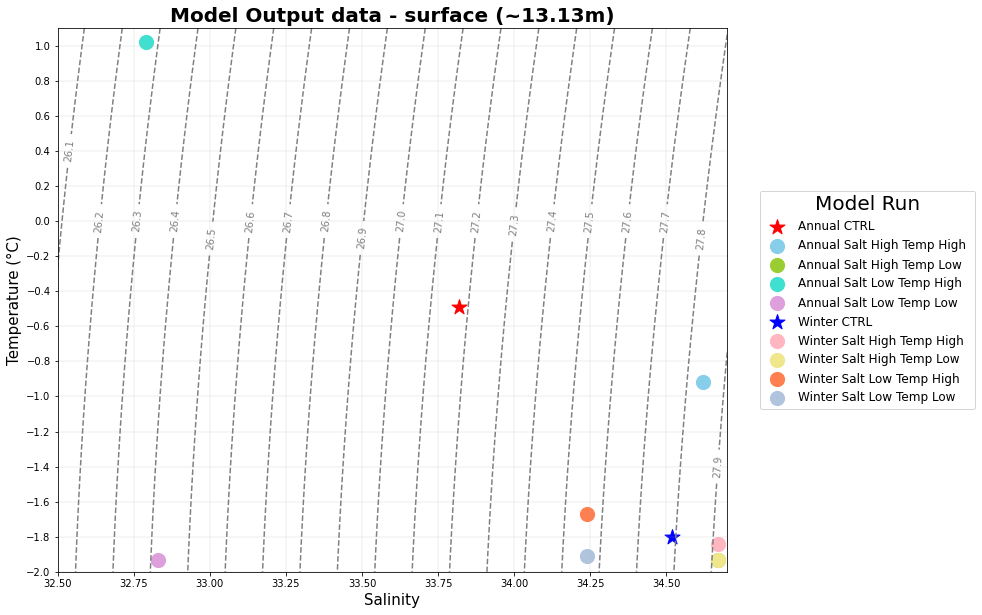

<Figure size 864x720 with 0 Axes>

In [62]:
data=pd.read_csv('ModelOutputData.csv')
df=data[['ModelRun','temp','salt','depth']]



# Calculate the density lines
x = np.arange(32.5, 34.8, .1)
y = np.arange(-2, 1.2, .1)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.1))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')



colours = ['r', 'skyblue', 'yellowgreen', 'turquoise', 'plum', 'lightpink', 'khaki', 'coral','lightsteelblue', 'b']
markers = ['o','*']

plt.rcParams["figure.figsize"] = (12,10)

Annual_CTRL_surface = plt.scatter(33.82, -0.49, s=250, marker=markers[1], color=colours[0], label='Annual CTRL ')




Annual_SaltHighTempHigh_surface = plt.scatter(34.62, -0.92, s=200, marker=markers[0], color=colours[1], label='Annual Salt High Temp High ')

Annual_SaltHighTempLow_surface = plt.scatter(34.67, -1.93, s=200, marker=markers[0], color=colours[2], label='Annual Salt High Temp Low ')

Annual_SaltLowTempHigh_surface = plt.scatter(32.79, 1.02, s=200, marker=markers[0], color=colours[3], label='Annual Salt Low Temp High ')

Annual_SaltLowTempLow_surface = plt.scatter(32.83, -1.93, s=200, marker=markers[0], color=colours[4], label='Annual Salt Low Temp Low ')


Winter_CTRL_surface = plt.scatter(34.52, -1.8, s=250, marker=markers[1], color=colours[9], label='Winter CTRL ')
Winter_SaltHighTempHigh_surface = plt.scatter(34.67, -1.84, s=200, marker=markers[0], color=colours[5], label='Winter Salt High Temp High ')

Winter_SaltHighTempLow_surface = plt.scatter(34.67, -1.93, s=200, marker=markers[0], color=colours[6], label='Winter Salt High Temp Low ')

Winter_SaltLowTempHigh_surface = plt.scatter(34.24, -1.67, s=200, marker=markers[0], color=colours[7], label='Winter Salt Low Temp High ')

Winter_SaltLowTempLow_surface = plt.scatter(34.24, -1.91, s=200, marker=markers[0], color=colours[8], label='Winter Salt Low Temp Low ')





plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5), title_fontsize=20, fontsize=12)

yticks=np.arange(-2.0,1.2,0.2)
plt.yticks(yticks)

plt.xlabel('Salinity', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
#plt.grid()
plt.title('Model Output data - surface (~13.13m)', fontweight='bold', fontsize=20);
plt.grid(linewidth=0.2)
plt.show()
plt.savefig('Model Output Data with density at surface')

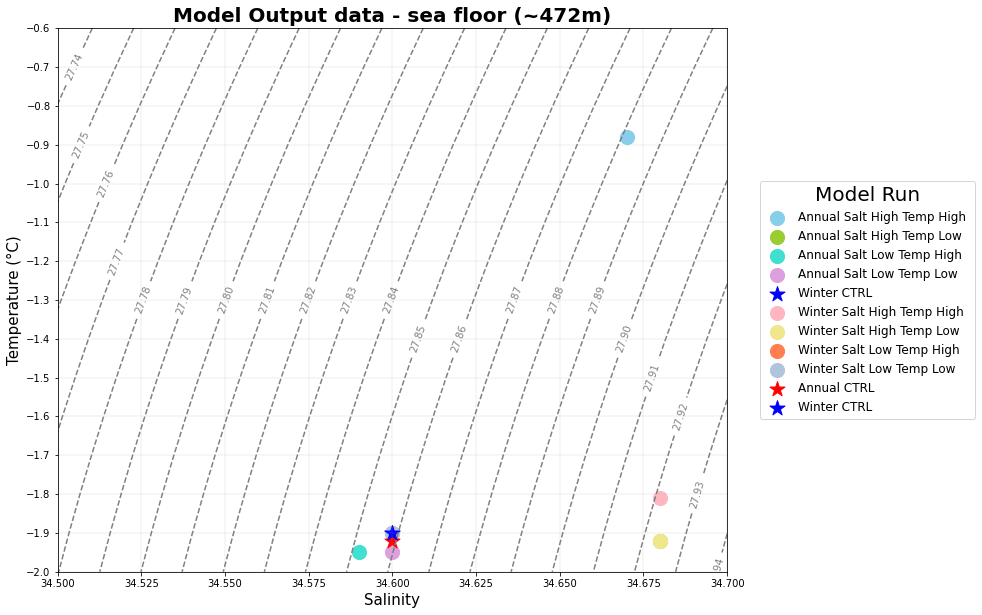

<Figure size 864x720 with 0 Axes>

In [5]:
data=pd.read_csv('ModelOutputData.csv')
df=data[['ModelRun','temp','salt','depth']]



# Calculate the density lines
x = np.arange(34.5, 34.8, .1)
y = np.arange(-2, -0.5, .1)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.01))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.2f')



colours = ['r', 'skyblue', 'yellowgreen', 'turquoise', 'plum', 'lightpink', 'khaki', 'coral','lightsteelblue', 'b']
markers = ['o','*']

plt.rcParams["figure.figsize"] = (12,10)




Annual_SaltHighTempHigh_bottom = plt.scatter(34.67, -0.88, s=200, marker=markers[0], color=colours[1], label='Annual Salt High Temp High ')

Annual_SaltHighTempLow_bottom = plt.scatter(34.68, -1.92, s=200, marker=markers[0], color=colours[2], label='Annual Salt High Temp Low ')

Annual_SaltLowTempHigh_bottom = plt.scatter(34.59, -1.95, s=200, marker=markers[0], color=colours[3], label='Annual Salt Low Temp High ')

Annual_SaltLowTempLow_bottom = plt.scatter(34.6, -1.95, s=200, marker=markers[0], color=colours[4], label='Annual Salt Low Temp Low ')


Winter_CTRL_bottom = plt.scatter(34.6, -1.9, s=250, marker=markers[1], color=colours[9], label='Winter CTRL ')

Winter_SaltHighTempHigh_bottom = plt.scatter(34.68, -1.81, s=200, marker=markers[0], color=colours[5], label='Winter Salt High Temp High ')

Winter_SaltHighTempLow_bottom = plt.scatter(34.68, -1.92, s=200, marker=markers[0], color=colours[6], label='Winter Salt High Temp Low ')

Winter_SaltLowTempHigh_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[7], label='Winter Salt Low Temp High ')

Winter_SaltLowTempLow_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[8], label='Winter Salt Low Temp Low ')

Annual_CTRL_bottom = plt.scatter(34.6, -1.92, s=250, marker=markers[1], color=colours[0], label='Annual CTRL ')

Winter_CTRL_bottom = plt.scatter(34.6, -1.9, s=250, marker=markers[1], color=colours[9], label='Winter CTRL ')


plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5), title_fontsize=20, fontsize=12)

yticks=np.arange(-2.0,-0.5,0.1)
plt.yticks(yticks)

plt.xlabel('Salinity', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
plt.grid(linewidth=0.2)
plt.title('Model Output data - sea floor (~472m)', fontweight='bold', fontsize=20);
plt.show()
plt.savefig('Model Output Data with density at sea floor')

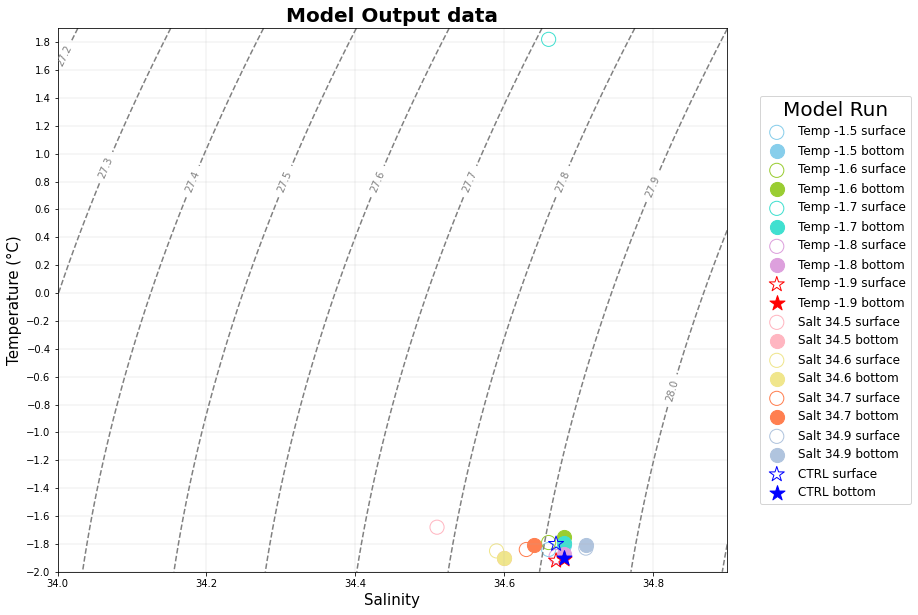

<Figure size 864x720 with 0 Axes>

In [6]:
data=pd.read_csv('ModelOutputDSWTests.csv')
df=data[['ModelRun','temp','salt','depth']]



# Calculate the density lines
x = np.arange(34, 35, .1)
y = np.arange(-2, 2, .1)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.1))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')



colours = ['r', 'skyblue', 'yellowgreen', 'turquoise', 'plum', 'lightpink', 'khaki', 'coral','lightsteelblue', 'b']
markers = ['o','*']

plt.rcParams["figure.figsize"] = (12,10)


TEMP_15_surface = plt.scatter(34.66, -1.84, s=200, marker=markers[0], facecolors='none', edgecolors=colours[1], label='Temp -1.5 surface')
TEMP_15_bottom = plt.scatter(34.68, -1.81, s=200, marker=markers[0], color=colours[1], label='Temp -1.5 bottom')

TEMP_16_surface = plt.scatter(34.66, -1.79, s=200, marker=markers[0], facecolors='none', edgecolors=colours[2], label='Temp -1.6 surface')
TEMP_16_bottom = plt.scatter(34.68, -1.75, s=200, marker=markers[0], color=colours[2], label='Temp -1.6 bottom')

TEMP_17_surface = plt.scatter(34.66, 1.82, s=200, marker=markers[0], facecolors='none', edgecolors=colours[3], label='Temp -1.7 surface')
TEMP_17_bottom = plt.scatter(34.68, -1.79, s=200, marker=markers[0], color=colours[3], label='Temp -1.7 bottom')

TEMP_18_surface = plt.scatter(34.67, -1.89, s=200, marker=markers[0], facecolors='none', edgecolors=colours[4], label='Temp -1.8 surface')
TEMP_18_bottom = plt.scatter(34.68, -1.87, s=200, marker=markers[0], color=colours[4], label='Temp -1.8 bottom')

TEMP_19_surface = plt.scatter(34.67, -1.92, s=250, marker=markers[1], facecolors='none', edgecolors=colours[0], label='Temp -1.9 surface')
TEMP_19_bottom = plt.scatter(34.68, -1.91, s=250, marker=markers[1], color=colours[0], label='Temp -1.9 bottom')




SALT_345_surface = plt.scatter(34.51, -1.68, s=200, marker=markers[0], facecolors='none', edgecolors=colours[5], label='Salt 34.5 surface')
SALT_345_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[5], label='Salt 34.5 bottom')

SALT_346_surface = plt.scatter(34.59, -1.85, s=200, marker=markers[0], facecolors='none', edgecolors=colours[6], label='Salt 34.6 surface')
SALT_346_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[6], label='Salt 34.6 bottom')

SALT_347_surface = plt.scatter(34.63, -1.84, s=200, marker=markers[0], facecolors='none', edgecolors=colours[7], label='Salt 34.7 surface')
SALT_347_bottom = plt.scatter(34.64, -1.81, s=200, marker=markers[0], color=colours[7], label='Salt 34.7 bottom')

SALT_349_surface = plt.scatter(34.71, -1.83, s=200, marker=markers[0], facecolors='none', edgecolors=colours[8], label='Salt 34.9 surface')
SALT_349_bottom = plt.scatter(34.71, -1.81, s=200, marker=markers[0], color=colours[8], label='Salt 34.9 bottom')




CTRL_surface = plt.scatter(34.67, -1.8, s=250, marker=markers[1], facecolors='none', edgecolors=colours[9], label='CTRL surface')
CTRL_bottom = plt.scatter(34.68, -1.9, s=250, marker=markers[1], color=colours[9], label='CTRL bottom')


plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5), title_fontsize=20, fontsize=12)

yticks=np.arange(-2.0,2,0.2)
plt.yticks(yticks)

plt.xlabel('Salinity', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
plt.grid(linewidth=0.2)
plt.title('Model Output data', fontweight='bold', fontsize=20);
plt.show()
plt.savefig('Model Output Data - DSW Testing.png')

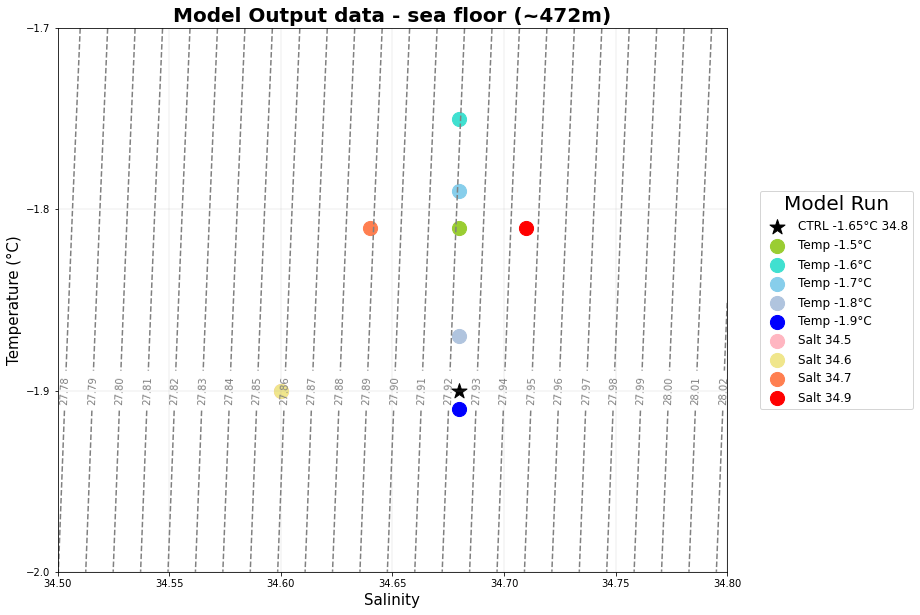

<Figure size 864x720 with 0 Axes>

In [7]:
data=pd.read_csv('ModelOutputDSWTests.csv')
df=data[['ModelRun','temp','salt','depth']]



# Calculate the density lines
x = np.arange(34.5, 34.9, .1)
y = np.arange(-2, -1.7, .1)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.01))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.2f')



colours = ['r', 'skyblue', 'yellowgreen', 'turquoise', 'plum', 'lightpink', 'khaki', 'coral','lightsteelblue', 'b', 'k']
markers = ['o','*']

plt.rcParams["figure.figsize"] = (12,10)


CTRL_bottom = plt.scatter(34.68, -1.9, s=250, marker=markers[1], color=colours[10], label='CTRL -1.65°C 34.8')

TEMP_15_bottom = plt.scatter(34.68, -1.81, s=200, marker=markers[0], color=colours[2], label='Temp -1.5°C')

TEMP_16_bottom = plt.scatter(34.68, -1.75, s=200, marker=markers[0], color=colours[3], label='Temp -1.6°C')

TEMP_17_bottom = plt.scatter(34.68, -1.79, s=200, marker=markers[0], color=colours[1], label='Temp -1.7°C')

TEMP_18_bottom = plt.scatter(34.68, -1.87, s=200, marker=markers[0], color=colours[8], label='Temp -1.8°C')

TEMP_19_bottom = plt.scatter(34.68, -1.91, s=200, marker=markers[0], color=colours[9], label='Temp -1.9°C')




SALT_345_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[5], label='Salt 34.5')

SALT_346_bottom = plt.scatter(34.6, -1.9, s=200, marker=markers[0], color=colours[6], label='Salt 34.6')

SALT_347_bottom = plt.scatter(34.64, -1.81, s=200, marker=markers[0], color=colours[7], label='Salt 34.7')

SALT_349_bottom = plt.scatter(34.71, -1.81, s=200, marker=markers[0], color=colours[0], label='Salt 34.9')






plt.legend(title='Model Run',loc="center left", bbox_to_anchor=(1.04, 0.5), title_fontsize=20, fontsize=12)

yticks=np.arange(-2.0,-1.7,0.1)
plt.yticks(yticks)

plt.xlabel('Salinity', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
plt.grid(linewidth=0.2)
plt.title('Model Output data - sea floor (~472m)', fontweight='bold', fontsize=20);
plt.show()
plt.savefig('Model Output Data - DSW Testing.png')